In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colormaps as cm
from tqdm.notebook import tqdm
from package import tessellations

In [2]:
n = 12
experiments = 100

In [3]:
def calculate_mean_perisstent_euler(dfs, with_bar=True):
    # 
    vals = np.unique(np.concatenate([df[['A', 'B']].values for df in dfs]))
    df = pd.DataFrame({'A': vals[:-1], 'B': vals[1:]})
    df['C'] = 0.5*df['A'] + 0.5*df['B']
    df.loc[df['C'] == -np.inf, 'C'] = df.loc[df['C'] == -np.inf, 'B'] - 1
    df.loc[df['C'] == +np.inf, 'C'] = df.loc[df['C'] == +np.inf, 'A'] + 1
    if with_bar:
        bar0 = tqdm(total=len(df))
        bar1 = tqdm(total=len(dfs))
    chars = []
    for c in df['C']:
        that_chars = []
        for i in dfs:
            that_chars.append(i[(i['A'] < c) & (i['B'] > c)]['Euler Char'].values[0])
            if with_bar:
                bar1.update()
        chars.append(that_chars)
        if with_bar:
            bar0.update()
            if c != list(df['C'])[-1]:
                bar1.reset()
    if with_bar:
        bar0.close()
        bar1.close()
    df['chars'] = chars#[[i[(i['A'] < c) & (i['B'] > c)]['Euler Char'].values[0] for i in dfs] for c in df['C']]
    if with_bar:
        bar2 = tqdm(total=len(df))
    mpe = []
    for i in df['chars']:
        mpe.append(np.mean(i))
        if with_bar:
            bar2.update()
    if with_bar:
        bar2.close()
    df['Mean Euler Char'] = mpe
    return df[['A', 'B', 'Mean Euler Char']]

In [4]:
def df_func(array, df, colname='Mean Euler Char'):
    # 
    return [df[(df['A'] <= x) & (df['B'] > x)][colname].values[0] for x in array]

# Cubics on 2d torus

In [5]:
fc = tessellations.get_cubical_tessellation_on_torus2d(n)

giant_cycle_births = np.zeros([0, 3])
persistent_euler_chars = []

bar0 = tqdm(total=experiments)
for i in range(experiments):
    fc.set_filtration(np.random.random(n**2))
    fc.initialize_complex()
    gb = fc.get_giant_cycles()
    if list(gb['Dimension']) == [0, 1, 1]:
        giant_cycle_births = np.concatenate([giant_cycle_births, gb['Birth'].values.reshape([1, 3])])
    else:
        print('Oups! Something is wrong:')
        fc.draw_filtration()
        print('Giant cycles birth table looks like\n{0}'.format(gb))
        raise ValueError()
    persistent_euler_chars.append(fc.persistent_euler())
    bar0.update()
bar0.close()

  0%|          | 0/100 [00:00<?, ?it/s]

In [6]:
mpe = calculate_mean_perisstent_euler(persistent_euler_chars)
mpe

  0%|          | 0/8348 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/8348 [00:00<?, ?it/s]

,A,B,Mean Euler Char
0,-inf,0.000028,0.00
1,0.000028,0.000084,0.01
2,0.000084,0.000137,0.02
3,0.000137,0.000159,0.03
4,0.000159,0.000212,0.04
...,...,...,...
8343,0.997954,0.998109,-1.04
8344,0.998109,0.998805,-1.03
8345,0.998805,0.999601,-1.02
8346,0.999601,0.999731,-1.01


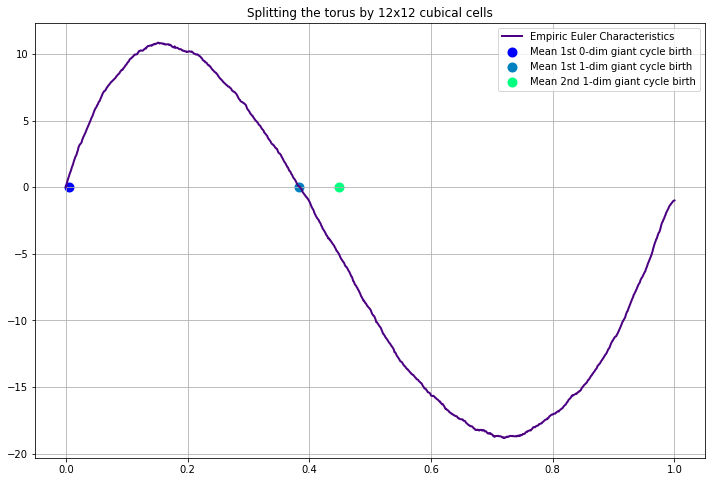

In [7]:
x = np.arange(0, 1.001, 0.001)
y = df_func(x, mpe)

plt.figure(figsize=(12, 8))
plt.title('Splitting the torus by {0}x{0} cubical cells'.format(n))
plt.plot(x, y, color='indigo', linewidth=2, label='Empiric Euler Characteristics')

labels = ['Mean 1st 0-dim giant cycle birth', 
          'Mean 1st 1-dim giant cycle birth', 
          'Mean 2nd 1-dim giant cycle birth']
colormap = cm['winter']
for i in range(3):
    plt.scatter(np.mean(giant_cycle_births, axis=0)[i], 0, color=colormap(i/2), label=labels[i], linewidth=4)

plt.grid(True)
plt.legend()
plt.show()

# Hexagons on 2d torus

In [8]:
fc = tessellations.get_hexagonal_tessolation_on_torus2d(n)

giant_cycle_births = np.zeros([0, 3])
persistent_euler_chars = []

bar0 = tqdm(total=experiments)
for i in range(experiments):
    fc.set_filtration(np.random.random(n**2))
    fc.initialize_complex()
    gb = fc.get_giant_cycles()
    if list(gb['Dimension']) == [0, 1, 1]:
        giant_cycle_births = np.concatenate([giant_cycle_births, gb['Birth'].values.reshape([1, 3])])
    else:
        print('Oups! Something is wrong:')
        fc.draw_filtration()
        print('Giant cycles birth table looks like\n{0}'.format(gb))
        raise ValueError()
    persistent_euler_chars.append(fc.persistent_euler())
    bar0.update()
bar0.close()

  0%|          | 0/100 [00:00<?, ?it/s]

In [9]:
mpe = calculate_mean_perisstent_euler(persistent_euler_chars)
mpe

  0%|          | 0/7976 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/7976 [00:00<?, ?it/s]

,A,B,Mean Euler Char
0,-inf,0.000030,0.00
1,0.000030,0.000128,0.01
2,0.000128,0.000158,0.02
3,0.000158,0.000161,0.03
4,0.000161,0.000162,0.04
...,...,...,...
7971,0.996617,0.996681,-1.04
7972,0.996681,0.997146,-1.03
7973,0.997146,0.998161,-1.02
7974,0.998161,0.999580,-1.01


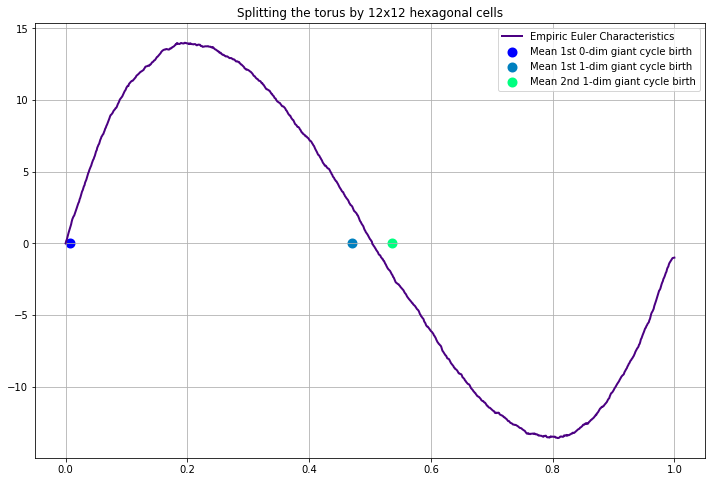

In [12]:
x = np.arange(0, 1.001, 0.001)
y = df_func(x, mpe)

plt.figure(figsize=(12, 8))
plt.title('Splitting the torus by {0}x{0} hexagonal cells'.format(n))
plt.plot(x, y, color='indigo', linewidth=2, label='Empiric Euler Characteristics')

labels = ['Mean 1st 0-dim giant cycle birth', 
          'Mean 1st 1-dim giant cycle birth', 
          'Mean 2nd 1-dim giant cycle birth']
colormap = cm['winter']
for i in range(3):
    plt.scatter(np.mean(giant_cycle_births, axis=0)[i], 0, color=colormap(i/2), label=labels[i], linewidth=4)

plt.grid(True)
plt.legend()
plt.show()